# Learning and Decision Making

## Laboratory 4: MNIST

In the end of the lab, you should save the notebook as `padi-lab4-groupXX.ipynb`, where the `XX` corresponds to your group number and should be submitted to the e-mail <adi.tecnico@gmail.com>. 

Make sure that the subject is of the form `[<group n.>] LAB <lab n.>`.

### 1. The MNIST dataset

The National Institute of Standards and Technology (NIST) published in 1995 a corpus for handprinted document and character recognition. The corpus originally contained 810,000 character images from 3,600 different writers. The MNIST ("Modified NIST") dataset was created from the original NIST dataset and contains a total of 70,000 normalized images ($28\times28$ pixels) containing handwritten digits. All images are grayscale and anti-aliased. 

---

In this lab, we work with a simplified version of the MNIST dataset, in order to have the algorithms run in a manageable amount of time. In such modified dataset, digit images have been pre-processed to $8\times 8$ images, where each pixel takes values between 0 and 16. The modified dataset is available in `scikit-learn` through its `datasets` module. We thus start by loading the digits dataset.

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<IPython.core.display.Javascript object>


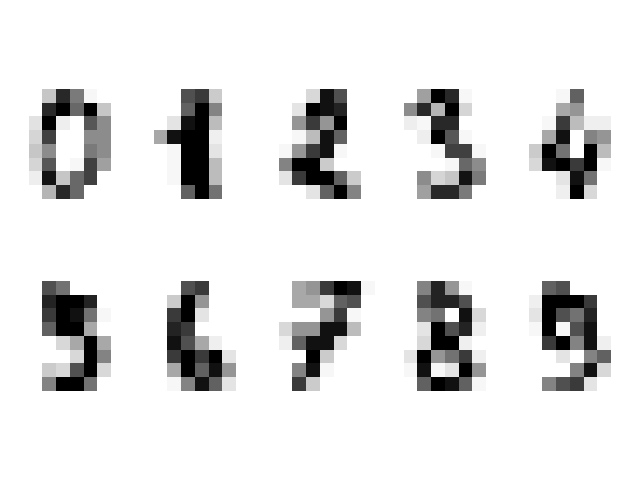

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as data

# Load dataset and print its description
digits = data.load_digits()
print(digits.DESCR)

# Get dimensions 
nP = digits.data.shape[0]
nF = digits.data.shape[1]


fig = plt.figure()

# Print sample digits
for i in range(10): 
    plt.subplot(2, 5, i + 1)
    idx = list(digits.target).index(i)
    plt.imshow(digits.images[idx], cmap='Greys')
    plt.axis('off')

fig.tight_layout()
plt.show()

In the first activities, you will prepare the dataset, before running any learning algorithms.

---

#### Activity 1.        

From the MNIST dataset, construct the training and test sets. The input data can be accessed as the attribute `data` in the dataset `digits`; the corresponding output data can be accessed as the attribute `target` in `digits`. To build the train and test sets, you can use the function `train_test_split` from the module `model_selection` of `scikit-learn`. Make sure that the test set corresponds to $1/7$th of the total number of samples. 

**Note:** Don't forget to import the necessary modules from `scikit-learn`. Also, for reproducibility, initialize the seed of the `train_test_split` function to a fixed number (e.g., 42).

---

In [3]:
# Add your code here.
import numpy as np
from sklearn.model_selection import train_test_split

x: np.ndarray = digits.data
y: np.ndarray = digits.target
    
trnX, tstX, trnY, tstY = train_test_split(x, y, test_size=1/7,random_state=42)

print(f"Training set (size={len(trnX)})\nFeatures data:\n{trnX}\nTarget/Classes data:\n{trnY}\n")
print(f"\nTest set (size={len(tstX)})\nFeatures data:\n{tstX}\nTarget/Classes data:\n{tstY}\n")


Training set (size=1540)
Features data:
[[ 0.  0.  1. ...  3.  0.  0.]
 [ 0.  0.  9. ...  0.  0.  0.]
 [ 0.  0.  8. ... 11.  0.  0.]
 ...
 [ 0.  0.  9. ... 16.  2.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0.  1. ...  1.  0.  0.]]
Target/Classes data:
[8 8 3 ... 2 7 1]


Test set (size=257)
Features data:
[[ 0.  0.  0. ... 14.  5.  0.]
 [ 0.  0. 11. ...  1.  0.  0.]
 [ 0.  0.  8. ...  8.  0.  0.]
 ...
 [ 0.  0. 13. ... 16. 16. 11.]
 [ 0.  0.  9. ... 10.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]]
Target/Classes data:
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 

### 2. Principal component analysis (PCA)

Right now, each point in the dataset is represented by the pixel information, which roughly corresponds to $64$ features. In this activity, you will determine a small number of alternative features that manage to capture most of the relevant information contained in each picture but which provide a much more compact representation thereto. Such features correspond to the _principal components_ that you will compute next. PCA can be performed through the function `PCA`, in the `decomposition` module of `scikit-learn`. 

---

#### Activity 2.        

* Run PCA on the training set. To do this, you should first fit the PCA model to the train data and then use the resulting model to transform the data. For details, check the documentation for the function `PCA`.

* To grasp how much of the information in the data is contained in the different components, plot the _cumulative explained variance_ (in percentage) as a function of the number of components. The explained variance can be accessed via the attribute `explained_variance_` of your model.

**Note:** In general, before running PCA on some training set, you should _standardize_ the data to make sure that all inputs are centered and lie in the same range. To do this, you can use the function `StandardScaler` of the module `preprocessing` of `scikit-learn`.

---

PCA model: 
PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Cumulative Explained variance of the PCA model
 [ 7.32545823 13.20875214 18.47710661 22.41536395 25.39509895 27.97586042
 30.35492851 32.38954316 34.23665722 36.03487318 37.73413434 39.28502447
 40.68012317 42.06354548 43.3721798  44.5392431  45.6118907  46.59606385
 47.57631659 48.48856662 49.31246371 50.09419999 50.79311347 51.43660973
 52.032574   52.60643986 53.13707533 53.64485474 54.12714628 54.58913311
 55.02540308 55.44857994 55.84997636 56.23544059 56.58654829 56.92097609
 57.22498183 57.51762407 57.79479795 58.05537568 58.30573298 58.544136
 58.76622608 58.97355996 59.17276676 59.36253509 59.53528128 59.70033898
 59.85865399 60.00106061 60.13305079 60.25657563 60.37285543 60.48321128
 60.58418152 60.68304744 60.77154085 60.8513363  60.92660606 60.9901619
 61.03963613 61.03963613 61.03963613 61.03963613]


<IPython.core.display.Javascript object>


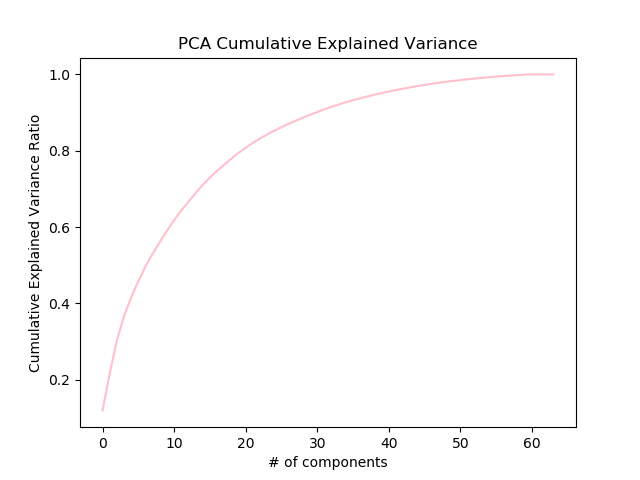

In [4]:
# Add your code here.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data_transf = StandardScaler().fit_transform(trnX)


X_new = PCA().fit(data_transf)
X_new_train = X_new.transform(data_transf)

print(f"PCA model: \n{X_new}")
print(f"\nCumulative Explained variance of the PCA model\n {np.cumsum(X_new.explained_variance_)}")


plt.figure()
plt.plot(np.cumsum(X_new.explained_variance_ratio_),color='pink')
plt.xlabel("# of components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("PCA Cumulative Explained Variance")
plt.show()

Note how a small number of components explain around 90\% of the variance in the data. As such, it seems reasonable that we may rely only on those components as features to represent our data.

### 3. Impact of number of features on a Logistic Regression classifier

To clearly understand the implications of the adopted representation, you will now run an extensive test to investigate how the number of components may impact the performance of the classifier. 

---

#### Activity 3.        

Take the data in your training set and further split it in two sets, $D_T$ and $D_V$, where $D_T$ corresponds to $85\%$ of the training data and $D_V$ to the remaining $15\%$. You will use $D_T$ for training, and $D_V$ for validation. 

For $k\in\{5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 64\}$,

* Run PCA with $k$ components on the data in $D_T$
* Transform the data in $D_T$ using the computed PCA
* Train a logistic regression classifier on the transformed data. Use $C=100$, the `'newton-cg'` solver, and set the multi_class option to `'auto'`
* Compute the error in $D_T$ and in $D_V$

Repeat the _whole process_ (including the split of $D_T$ and $D_V$) 40 times.

**Note 1:** Don't forget that, in order to run PCA, you should standardize the data once again; you should not use the standardized data from Activity 2, since it has seen the whole data in $D_T$ and $D_V$. 

**Note 2:** Also, don't forget that, in order to run your classifier with the data in $D_V$, you must transform it with the PCA fit to $D_T$.

**Note 3:** The whole process may take a while, so don't despair. The logistic regression classifier can be accessed by importing `LogisticRegression` from `sklearn.linear_model`. To compute the error of a classifier, you can use the `accuracy_score` function from `sklearn.metrics`.

---

In [18]:
# Add your code here.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

k = [5,10,15,20,25,30,35,40,45,50,55,60,64]
dt_errors,dv_errors=[],[]
for i in range(40):
    dt_pca_error, dv_pca_error = [],[]
    dtX, dvX, dtY, dvY = train_test_split(trnX,trnY, test_size = 0.15, random_state = 42)
    data_normalizedX = StandardScaler().fit_transform(dtX)
    data_normalizedVX = StandardScaler().fit_transform(dvX)
    print("yerp,im here")
    for pca_num in k:
        dt_fit = PCA(n_components = pca_num).fit(data_normalizedX)
        dt_transf = dt_fit.transform(data_normalizedX)
        dv_transf = dt_fit.transform(data_normalizedVX)
        classifier = LogisticRegression(C = 100,solver='newton-cg', multi_class='auto')
        classifier.fit(dt_transf,dtY)
        prd_dt =  classifier.predict(dt_transf)
        prd_dv = classifier.predict(dv_transf)
        dt_score =accuracy_score(dtY, prd_dt)
        dv_score =accuracy_score(dvY, prd_dv)
        dt_pca_error.append(dt_score)
        dv_pca_error.append(dv_score)
    dt_errors.append(dt_pca_error)
    dv_errors.append(dv_pca_error)

print("this is my len_dt", "this is my len_dv" ,len(dt_errors),len(dv_errors))


            
            
            
            

yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
this is my len_dt this is my len_dv 40 40


---

#### Activity 4.

Plot the average training and validation error from Activity 3 as a function of $k$. Explain the differences observed between the two curves.

---

<IPython.core.display.Javascript object>


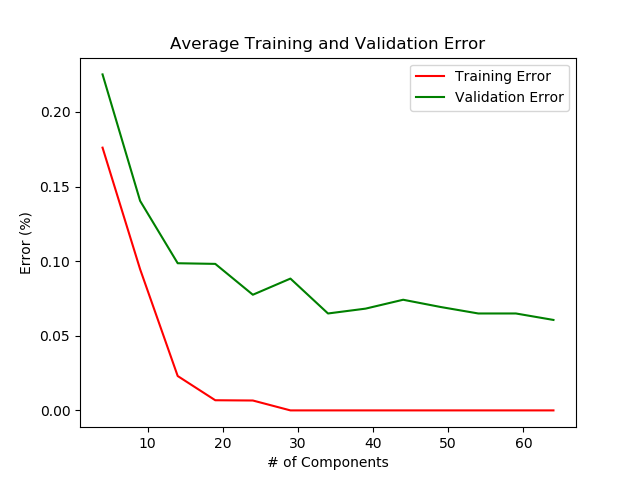

In [19]:
# Add your code here.

plt.figure()
plt.plot(range(4,65,5), 1 - (np.array(dt_errors)).mean(axis=0), label="Training Error", color="red")
plt.plot(range(4,65,5), 1 - (np.array(dv_errors)).mean(axis=0), label="Validation Error", color="green")
plt.ylabel("Error (%)")
plt.xlabel("# of Components")
plt.title("Average Training and Validation Error")
plt.legend()
plt.show()

<span style="color:blue">Add your comments here.</span>

### 4. Comparison of different classifiers

In Activity 4 you investigated the impact of the number of features on the performance of the Logistic Regression algorithm. You will now compare the performance of the best logistic regression algorithm with another algorithm from the literature.

---

#### Activity 5.        

* Repeat Activity 3 but now using a 5-Nearest Neighbors classifier instead of a Logistic Regression. 
* Plot the average training and validation error as a function of 𝑘.

**Note:** Again, the whole process may take a while, so don't despair. The kNN classifier can be accessed by importing `KNeighborsClassifier` from `sklearn.neighbors`.

---

yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here
yerp,im here


<IPython.core.display.Javascript object>


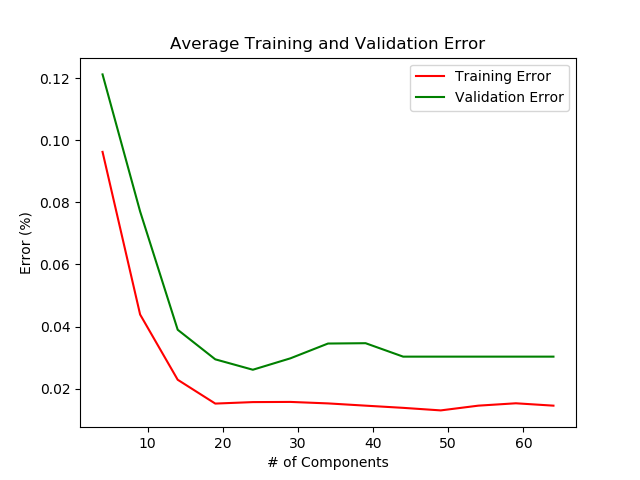

In [20]:
# Add your code here.

from sklearn.neighbors import KNeighborsClassifier

k = [5,10,15,20,25,30,35,40,45,50,55,60,64]
dt_errors,dv_errors=[],[]
for i in range(40):
    dt_pca_error, dv_pca_error = [],[]
    dtX, dvX, dtY, dvY = train_test_split(trnX,trnY, test_size = 0.15, random_state = 42)
    data_normalizedX = StandardScaler().fit_transform(dtX)
    data_normalizedVX = StandardScaler().fit_transform(dvX)
    print("yerp,im here")
    for pca_num in k:
        dt_fit = PCA(n_components = pca_num).fit(data_normalizedX)
        dt_transf = dt_fit.transform(data_normalizedX)
        dv_transf = dt_fit.transform(data_normalizedVX)
        classifier = KNeighborsClassifier()
        classifier.fit(dt_transf,dtY)
        prd_dt =  classifier.predict(dt_transf)
        prd_dv = classifier.predict(dv_transf)
        dt_score =accuracy_score(dtY, prd_dt)
        dv_score =accuracy_score(dvY, prd_dv)
        dt_pca_error.append(dt_score)
        dv_pca_error.append(dv_score)
    dt_errors.append(dt_pca_error)
    dv_errors.append(dv_pca_error)
    
plt.figure()
plt.plot(range(4,65,5), 1 - (np.array(dt_errors)).mean(axis=0), label="Training Error", color="red")
plt.plot(range(4,65,5), 1 - (np.array(dv_errors)).mean(axis=0), label="Validation Error", color="green")
plt.ylabel("Error (%)")
plt.xlabel("# of Components")
plt.title("Average Training and Validation Error")
plt.legend()
plt.show()

---

#### Activity 6.        

Taking into consideration the results from Activities 3 and 5, select the classifier and number of features that you believe is best and

* Compute the performance of your selected classifier on the test data. 
* Comment whether the performance on the test data matches what you expected, based on the results from activities 3 and 5.

**Note:** When computing the performance of your selected classifier, you should re-train it using the whole training data.

---

In [22]:
# Add your code here.

fit_best_pca = PCA(n_components=49).fit(data_transf)
transf_tstX= fit_best_pca.transform(tstX)
transf_best_pca = fit_best_pca.transform(data_transf)
classifier = KNeighborsClassifier()
classifier.fit(transf_best_pca,trnY)

tstY_pred = classifier.predict(transf_tstX)



print(f"\nTest Accuracy Score: {accuracy_score(tstY, tstY_pred):.2f}")






Test Accuracy Score: 0.80


<span style="color:blue">Add your comments here.</span>